
# Gravitational Lensing

<i>A. Bolton, 2017</i>

Updated 2018:
<i> Elliot Kisiel</i> and <i>Connie Walker</i>

## Instructions and overview
You have learned about how we can measure the mass of a galaxy based on the gravitational lensing of a foreground galaxy. This lensing effect can be seen in the various images below. In this activity we will be walking through some of the steps that astronomers use to determine the mass of a galaxy by examining the lensing effects.<br>

<img src="SloanLensACS_Survey.pdf" width="900" height="1080
0"><br><br>
### To execute the code in each box (or "cell"), hold down the "shift" key and press the "return" key<br>


## Setup and definitions

In [1]:
# Import necessary modules:
import numpy as n
import matplotlib as m
m.interactive(True)
from matplotlib import pyplot as p
from matplotlib import cm
import lensdemo_funcs as ldf

### Programming side note

The previous cell is a way of importing the necessary functions and other stuff to allow us to make pictures and do math super easy. In the next cell, we will be using a dictionary to easily group things together. Like how in a normal dictionary there is a word and a definition, this dictionary acts in a similar manner but instead of a word, we call it a key and instead of a definition we call it a value.

dictionary = {key1 : value1, key2 : value2 ...}

In [3]:
# Package some image display preferences in a "dictionary object", for use below:
myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.nipy_spectral}
# The following specifies an alternate color map, which some may find preferable.
# Un-comment and execute the following line if you want to use it:
# myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.hot}

## Exercise 1

In this exercise you will be playing around with the different parameters of a distant galaxy, we will name this galaxy Pat. This will be the galaxy that will eventually be lensed. What would you expect a very distant galaxy to look like? Would it be shaped like a spiral? A point? Some sort of smear? Think about this and then discuss with a person near you. <br><br>
Once you have thought about that, we will start to set up some of the parameters below to get an image of what Pat is going to look like. First run the program as it is set up. Then tweak the parameters until Pat looks how you want it. Our recommendation is to tweak one parameter (e.g. g_sig, g_amp, g_axrat, etc.) at a time to see when you run the program how that parameter changes Pat. Try this a few times. Talk to person next to you and describe one or two way in which Pat looks different.

### gpar = [g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa]

Where the parameters are defined as:

g_amp is the peak brightness value<br>
g_sig is how spread out Pat is<br>
g_xcen is the x position of the center of Pat<br>
g_ycen is the y position of the center of Pat<br>
g_axrat is the minor-to-major axis ratio<br>
g_pa is the major-axis position angle (degrees) c.c.w. from x axis<br>

Each of the parameters has the recommended ranges in values below:

0 <= g_amp <= 10.0<br>
0 <= g_sig <= 0.5<br>
0 <= g_xcen <= 1.0<br>
0 <= g_ycen <= 1.0<br>
0 <= g_axrat <= 1.0<br>
0 <= g_pa <= 180.0<br>

In [4]:
# Set some parameters to make x and y coordinate images:
nx = 501
ny = 501
xhilo = [-2.5, 2.5]
yhilo = [-2.5, 2.5]
x = (xhilo[1] - xhilo[0]) * n.outer(n.ones(ny), n.arange(nx)) / float(nx-1) + xhilo[0]
y = (yhilo[1] - yhilo[0]) * n.outer(n.arange(ny), n.ones(nx)) / float(ny-1) + yhilo[0]

In [19]:
# Set some Pat image parameters and pack them into an array:
g_amp = 0.1   # peak brightness value
g_sig = 0.1 # how spread out Pat is
g_xcen = 0.0 # x position of center
g_ycen = 0.0  # y position of center
g_axrat = 1.0# minor-to-major axis ratio
g_pa = 107    # major-axis position angle (degrees) c.c.w. from x axis
gpar = n.asarray([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa])

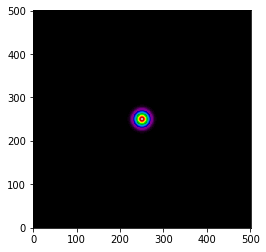

In [20]:
# Have a look at the un-lensed Pat:
g_image = ldf.gauss_2d(x, y, gpar)
f = p.imshow(g_image, **myargs)

## Exercise 2

Now that we have Pat, it is time to add a very massive, closer galaxy; we will name this one Chris. Scientists call Chris the lensing galaxy and Pat the lensed galaxy. The most important parameter for Chris is the Einstein radius. Knowing this parameter allows scientist to predict the mass of Chris, the lensing galaxy. We will be using Pat as our distant galaxy and tweak the parameters of Chris to see how each of the parameters changes what Pat looks like to us. First run the program as it is set up. Then tweak one parameter (e.g. l_amp, l_axrat, etc.) at a time to see when you run the program how that parameter changes Pat. Try this a few times. Talk to person next to you and describe one or two way in which Pat looks different.<br>

You may be wondering what exactly the Einstein radius is. If you are curious, we will explain it at the end of the activity. 

### lpar = [l_amp, l_xcen, l_ycen, l_axrat, l_pa]

Where the parameters are defined as:

l_amp is the Einstein radius of Chris<br>
l_xcen is the x position of the center of Chris<br>
l_ycen is the y position of the center of Chris<br>
l_axrat is the minor-to-major axis ratio<br>
l_pa is the major-axis position angle (degrees) c.c.w. from x axis<br>

Each of the parameters has the recommended ranges in values below:

0 <= l_amp <= 2.0<br>
0 <= l_xcen <= 1.0<br>
0 <= l_ycen <= 1.0<br>
0.1 <= l_axrat <= 20<br>
0.0 <= l_pa <= 180<br>

In [21]:
# Set some lens-model parameters and pack them into an array:
l_amp = 0.4 # Einstein radius
l_xcen = 0  # x position of center
l_ycen = 0 # y position of center
l_axrat = 0.7 # minor-to-major axis ratio
l_pa = 0.0    # major-axis position angle (degrees) c.c.w. from x axis
lpar = n.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])

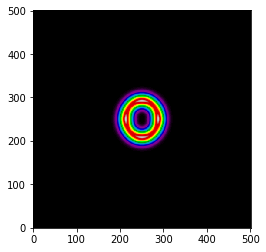

In [22]:
# Compute the lensing effects, ...
(xg, yg) = ldf.sie_grad(x, y, lpar)
# ... evaluate the lensed Pat image, ...
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
# ... and have a look at it:
f = p.imshow(g_lensimage, **myargs)

## Recap

   ### What does tweaking each parameter do? 
   ### Experiment by choosing one parameter above and changing the value.

## Exercise 3

Now that we have tweaked the parameters for both Pat and Chris individually, what happens if we change the parameters of both at the same time? In the following cells, the left image is Pat before it is lensed and the right image is Pat after its light has been bent by Chris and therefore lensed. It is important to note here that we are not displaying Chris. 

<img src="Lensed_Galaxy_Components_v2.pdf" width="800" height="600"><br>

For your convenience, the parameters are defined again below:<br>

### gpar = [g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa]

Where the parameters are defined as:

g_amp is the peak brightness value<br>
g_sig is how spread out Pat is<br>
g_xcen is the x position of the center of Pat<br>
g_ycen is the y position of the center of Pat<br>
g_axrat is the minor-to-major axis ratio<br>
g_pa is the major-axis position angle (degrees) c.c.w. from x axis<br>

### lpar = [l_amp, l_xcen, l_ycen, l_axrat, l_pa]

Where the parameters are defined as:

l_amp is the Einstein radius of Chris<br>
l_xcen is the x position of the center of Chris<br>
l_ycen is the y position of the center of Chris<br>
l_axrat is the minor-to-major axis ratio<br>
l_pa is the major-axis position angle (degrees) c.c.w. from x axis<br>

## Instructions

You should have a post-it note on the upper left side of your iMac with a number on it. If you do not raise your hand now. Using the five cells below, try to reproduce the image corresponding to the number on your post-it note. As a hint all of these have the same l_amp = 1.5, l_xcen = 0.0, l_ycen = 0.0, l_pa = 0.0 and have different l_axrat between 0.01 and 20. Finally, the range of values for Pat (the unlensed galaxy) are given by:


0 <= g_amp <= 10.0<br>
0 <= g_sig <= 0.5<br>
0 <= g_xcen <= 1.0<br>
0 <= g_ycen <= 1.0<br>
0 <= g_axrat <= 1.0<br>
0 <= g_pa <= 180.0<br>

Some helpful advice is to use the 5 cells as a means of tracking your progress. If you find an optimum scenario for one parameter, you can leave it as a reference and use another cell.

<img src="lens_image_mosaic_v2.png">

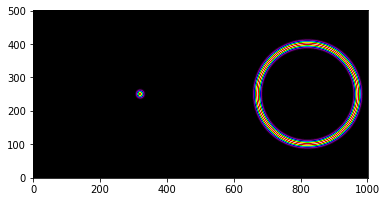

In [37]:
# The following lines will plot the un-lensed and lensed images side by side:
gpar1 = n.asarray([0.7, 0.05, 0.7, 0.0, 1.0, 0.0])
lpar1 = n.asarray([1.5, 0.7, 0.0, 1.0, 0.7])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
f = p.imshow(n.hstack((g_image1, g_lensimage1)), **myargs)

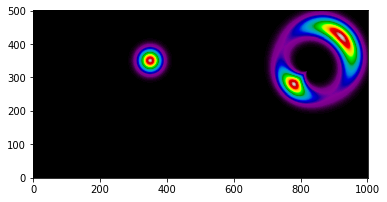

In [30]:
# The following lines will plot the un-lensed and lensed images side by side:
gpar1 = n.asarray([1.0, .2, 01.0, 1.0  , 1.0, 0.0])
lpar1 = n.asarray([1.0, 0.7, 0.7, 1.0, 0.0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
f = p.imshow(n.hstack((g_image1, g_lensimage1)), **myargs)

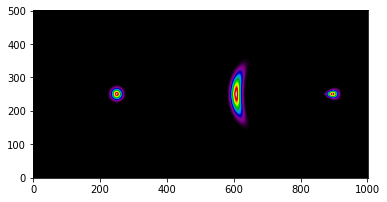

In [33]:
# The following lines will plot the un-lensed and lensed images side by side:
gpar1 = n.asarray([1.0, 0.087, 0.0, 0.0, 1.0, 0.0])
lpar1 = n.asarray([1.5, 0.777, 0.0, 0.8, 0.0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
f = p.imshow(n.hstack((g_image1, g_lensimage1)), **myargs)

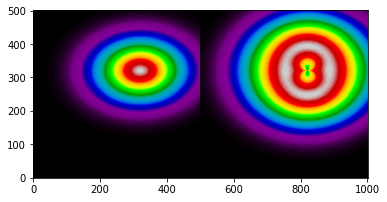

In [35]:
# The following lines will plot the un-lensed and lensed images side by side:
gpar1 = n.asarray([0.7, 0.7, 0.7, 0.7, 0.7, 0.7])
lpar1 = n.asarray([0.7, 0.7, 0.7, 0.7, 0.7])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
f = p.imshow(n.hstack((g_image1, g_lensimage1)), **myargs)

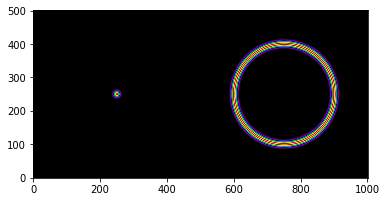

In [16]:
# The following lines will plot the un-lensed and lensed images side by side:
gpar1 = n.asarray([1.0, 0.05, 0.0, 0.0, 1.0, 0.0])
lpar1 = n.asarray([1.5, 0.0, 0.0, 1.0, 0.0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
f = p.imshow(n.hstack((g_image1, g_lensimage1)), **myargs)

## Challenge

Now that you have successfully remade one of the above images, it is time to try it with some real lensed galaxies. Below are several real galaxies from the presentation. Your goal is to choose one galaxy below and try to adjust the parameters to match the image (the lensed galaxy). Good luck! As a note, it may be a useful visual effect to change the value of the key 'cmap' in the first cell below to something like cm.magma, cm.inferno, cm.hot or cm.Blues<br>

For your convenience, the parameters are defined again below:<br>

### gpar = [g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa]

Where the parameters are defined as:

g_amp is the peak brightness value<br>
g_sig is how spread out Pat is<br>
g_xcen is the x position of the center of Pat<br>
g_ycen is the y position of the center of Pat<br>
g_axrat is the minor-to-major axis ratio<br>
g_pa is the major-axis position angle (degrees) c.c.w. from x axis<br>

### lpar = [l_amp, l_xcen, l_ycen, l_axrat, l_pa]

Where the parameters are defined as:

l_amp is the Einstein radius of Chris<br>
l_xcen is the x position of the center of Chris<br>
l_ycen is the y position of the center of Chris<br>
l_axrat is the minor-to-major axis ratio<br>
l_pa is the major-axis position angle (degrees) c.c.w. from x axis<br>

The values shoul be between the given ranges.

0 <= l_amp <= 10.0<br>
0 <= l_xcen <= 1.0<br>
0 <= l_ycen <= 1.0<br>
0 <= l_axrat <= 1.0<br>
0 <= l_pa <= 180.0<br>

Some helpful advice is to use the 5 cells as a means of tracking your progress. If you find an optimum scenario for one parameter, you can leave it as a reference and use another cell.

<img src="Lensed_Galaxy_Components_v2.pdf" width="800" height="600"><br><br>

<img src = "real_galaxies.png">

In [38]:
#You can change the last one to change the color of the map
myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.Blues}

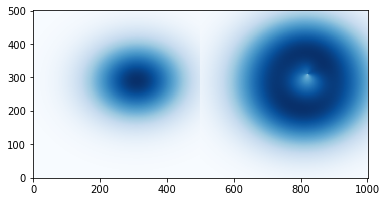

In [64]:
# The following lines will plot the un-lensed and lensed images side by side:
gpar1 = n.asarray([0.4, 0.9, 0.6, 0.4, 0.8, 1.0])
lpar1 = n.asarray([0.8, 0.7, 0.6, 0.8, 0.7])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
f = p.imshow(n.hstack((g_image1, g_lensimage1)), **myargs)

In [ ]:
# The following lines will plot the un-lensed and lensed images side by side:
gpar1 = n.asarray([1.0, 0.05, 0.0, .0, 1.0, 0.0])
lpar1 = n.asarray([1.5, 0.0, 0.0, 1.0, 0.0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
f = p.imshow(n.hstack((g_image1, g_lensimage1)), **myargs)

In [ ]:
# The following lines will plot the un-lensed and lensed images side by side:
gpar1 = n.asarray([1.0, 0.05, 0.0, .0, 1.0, 0.0])
lpar1 = n.asarray([1.5, 0.0, 0.0, 1.0, 0.0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
f = p.imshow(n.hstack((g_image1, g_lensimage1)), **myargs)

In [ ]:
# The following lines will plot the un-lensed and lensed images side by side:
gpar1 = n.asarray([1.0, 0.05, 0.0, .0, 1.0, 0.0])
lpar1 = n.asarray([1.5, 0.0, 0.0, 1.0, 0.0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
f = p.imshow(n.hstack((g_image1, g_lensimage1)), **myargs)

In [ ]:
# The following lines will plot the un-lensed and lensed images side by side:
gpar1 = n.asarray([1.0, 0.05, 0.0, .0, 1.0, 0.0])
lpar1 = n.asarray([1.5, 0.0, 0.0, 1.0, 0.0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
f = p.imshow(n.hstack((g_image1, g_lensimage1)), **myargs)

## Relation to the mass of galaxies

As stated above, the Einstein radius gives us the ability to measure the mass of the lensing galaxy. The parameters we have played with have to do with the geometry between the two galaxies and us and with the Einstein radius in particular. By optimizing the parameters in the last two activities, you estimated the value for the Einstein radius. Knowing that and the various distances involved, you can use the following formula to find the mass of the lensing galaxy.

$$ \theta_1 = \sqrt{\frac{4GM}{c^2}\frac{D_{LS}}{D_LD_S}} $$

In the equation above:

$\theta_1$ is the Einstein radius<br>
c is the speed of light<br>
G is the gravitational constant<br>
M is the mass of the lensed galaxy<br>
$D_L$ is the distance to the lensing galaxy (Chris)<br>
$D_S$ is the distance to the lensed galaxy (Pat)<br>
$D_{LS}$ is the distance from the lensed galaxy (Pat) to the lensing galaxy (Chris)<br>

The distances to these galaxies are determined by the galaxies' respective redshifted spectra. If you have any questions about how this is done, feel free to ask one of us.

In the diagram below, the Einstein radius is given by $\theta_1$.

<img src = "grav_lens.png">
<img src = "Einstein_radius.png" width = 400 height = 400>